###### Importing Libraries

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

###### Loading Dataset

In [210]:
df=pd.read_csv('D:/PORTFOLIO PROJECTS/3.DATA,WORK,PDFS/DATA SETS/hotel_booking.csv')

###### Exploratory Data analysis and data cleaning

In [211]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort_Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort_Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort_Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort_Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,7/2/2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort_Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,7/3/2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [212]:
df.shape

(119390, 36)

In [213]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [214]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [216]:
df["reservation_status_date"]=pd.to_datetime(df["reservation_status_date"])

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [218]:
df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City_Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [219]:
for col in df.describe(include=object).columns:
          print(col)
          print(df[col].unique())
          print("-"*50)
    

hotel
['Resort_Hotel' 'City_Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [220]:
 df.drop(["company","agent"],axis=1,inplace=True)
 df.dropna(inplace=True)

In [221]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [222]:
df.shape

(118898, 34)

###### Outliers detection and removing Outliers

In [223]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [224]:

# List of columns to check for outliers
columns_to_check = [
    'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

# Function to detect and print outliers using IQR method
def detect_outliers_iqr(data, columns_to_check):
    Q1 = df[columns_to_check].quantile(0.25)
    Q3 = df[columns_to_check].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(data[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)]
    return outliers

# Loop through each column and detect outliers
for column in columns_to_check:
    outliers = detect_outliers_iqr(df, column)
    print(f'Outliers in {column}:')
    print(outliers)
    print('\n')


Outliers in is_canceled:
Empty DataFrame
Columns: [hotel, is_canceled, lead_time, arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, meal, country, market_segment, distribution_channel, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, booking_changes, deposit_type, days_in_waiting_list, customer_type, adr, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date, name, email, phone-number, credit_card]
Index: []

[0 rows x 34 columns]


Outliers in lead_time:
               hotel  is_canceled  lead_time  arrival_date_year  \
1       Resort_Hotel            0        737               2015   
225     Resort_Hotel            0        394               2015   
890     Resort_Hotel            0        460               2015   
1516    Resort_Hotel            0        381 

In [225]:

# List of columns to check for outliers
columns_to_check = [
    'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
    'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
    'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

# Function to remove outliers using mean, std, and median methods
def remove_outliers(df, columns_to_check):
    for column in columns_to_check:
        # Calculate mean and std for the column
        mean = df[column].mean()
        std = df[column].std()
        
        # Calculate the lower and upper bounds for outliers (e.g., 2 std deviations from mean)
        lower_bound = mean - 2 * std
        upper_bound = mean + 2 * std
        
        # Calculate the median for the column
        median = df[column].median()
        
        # Replace values outside the bounds with the median
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df

# Create a copy of the original data to preserve it
df = df.copy()

# Remove outliers using the function
df = remove_outliers(df, columns_to_check)

# Print the shape of the cleaned DataFrame
print('Shape of the cleaned DataFrame:', df.shape)


Shape of the cleaned DataFrame: (118898, 34)


In [226]:
df.shape

(118898, 34)

In [227]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.0,118898.0,118898.0,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.0,118898.000000
mean,0.371352,87.938737,2016.157656,27.166555,15.800880,0.844985,2.295640,1.860906,0.0,0.0,0.0,0.050606,0.028823,0.106301,0.163064,97.847340,0.0,0.495929
std,0.483168,82.366865,0.707459,13.589971,8.780324,0.830829,1.402302,0.473275,0.0,0.0,0.0,0.219194,0.228470,0.308224,2.083088,36.657484,0.0,0.683630
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.290000,0.0,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,72.000000,0.0,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,95.000000,0.0,0.000000
75%,1.000000,138.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,120.000000,0.0,1.000000
max,1.000000,318.000000,2017.000000,53.000000,31.000000,2.000000,6.000000,3.000000,0.0,0.0,0.0,1.000000,3.000000,1.000000,37.000000,202.920000,0.0,2.000000


###### Data analysis and Visualizations

###### 1.Reservation status in count




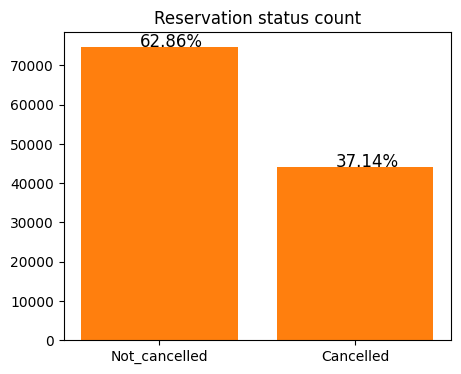

In [228]:
#calculates the percentage distribution of the "is_canceled" column in a DataFrame, 
#where it counts the number of occurrences of each unique value (0 and 1, likely representing not canceled and canceled reservations) 
#and then normalizes these counts to calculate the percentage of each value relative to the total number of rows in the DataFrame
cancelled_perc=df["is_canceled"].value_counts(normalize=True)
cancelled_perc

plt.figure(figsize=(5,4))
plt.title("Reservation status count")
plt.bar(["Not_cancelled","Cancelled"],df["is_canceled"].value_counts())
for bar, percentage in zip(plt.bar(["Not_cancelled","Cancelled"],df["is_canceled"].value_counts()), cancelled_perc):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f"{percentage:.2%}", fontsize=12)
plt.show()

###### The output represents the distribution of the "is_canceled" column in a dataset. It shows that approximately 62.87% of the reservations were not canceled (labeled as 0), while approximately 37.14% of the reservations were canceled (labeled as 1). This information provides insights into the proportion of canceled and non-canceled reservations in the dataset, which can be valuable for understanding reservation patterns.
###### Summary:The majority of reservations were not canceled (62.87%).A significant number of reservations were canceled (37.14%).

###### 2. Reservation status in different hotels


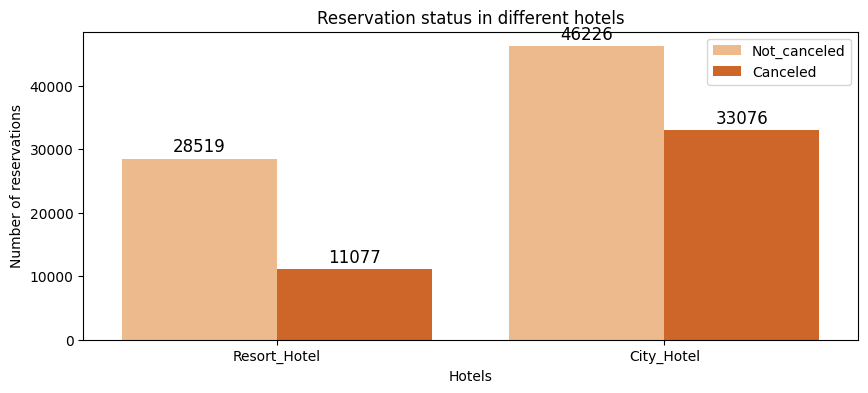

In [229]:
plt.figure(figsize=(10, 4))
axl = sns.countplot(x="hotel", hue="is_canceled", data=df, palette="Oranges")

# Add count labels above each bar
for p in axl.patches:
    height = p.get_height()
    axl.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

legend_labels, _ = axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1, 1))
plt.title("Reservation status in different hotels")
plt.xlabel("Hotels")
plt.ylabel("Number of reservations")
plt.legend(["Not_canceled","Canceled"])
plt.show()

###### The countplot shows the distribution of reservations in different hotels, distinguishing between "canceled" and "not canceled" reservations. It provides a clear visual representation of reservation status across hotel categories.
###### Summary:The City Hotel has the most reservations, followed by the Resort Hotel .The City Hotel also has the most canceled reservations, followed by the Resort Hotel .

In [230]:
Resort_hotel=df[df["hotel"]=="Resort_Hotel"]
Resort_hotel["is_canceled"].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [231]:
city_hotel=df[df["hotel"]=="City_Hotel"]
city_hotel["is_canceled"].value_counts(normalize=True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

###### 3.Average Daily Rate Comparison Between Resort and City Hotels

In [245]:
Resort_Hotel = df[df['hotel'] == 'Resort_Hotel']  
# Group by "reservation_status_date" and calculate the mean of the "adr" column
resort_hotel = Resort_Hotel.groupby("reservation_status_date")[["adr"]].mean()

City_Hotel = df[df['hotel'] == 'City_Hotel']  
# Group by "reservation_status_date" and calculate the mean of the "adr" column
city_hotel = City_Hotel.groupby("reservation_status_date")[["adr"]].mean()


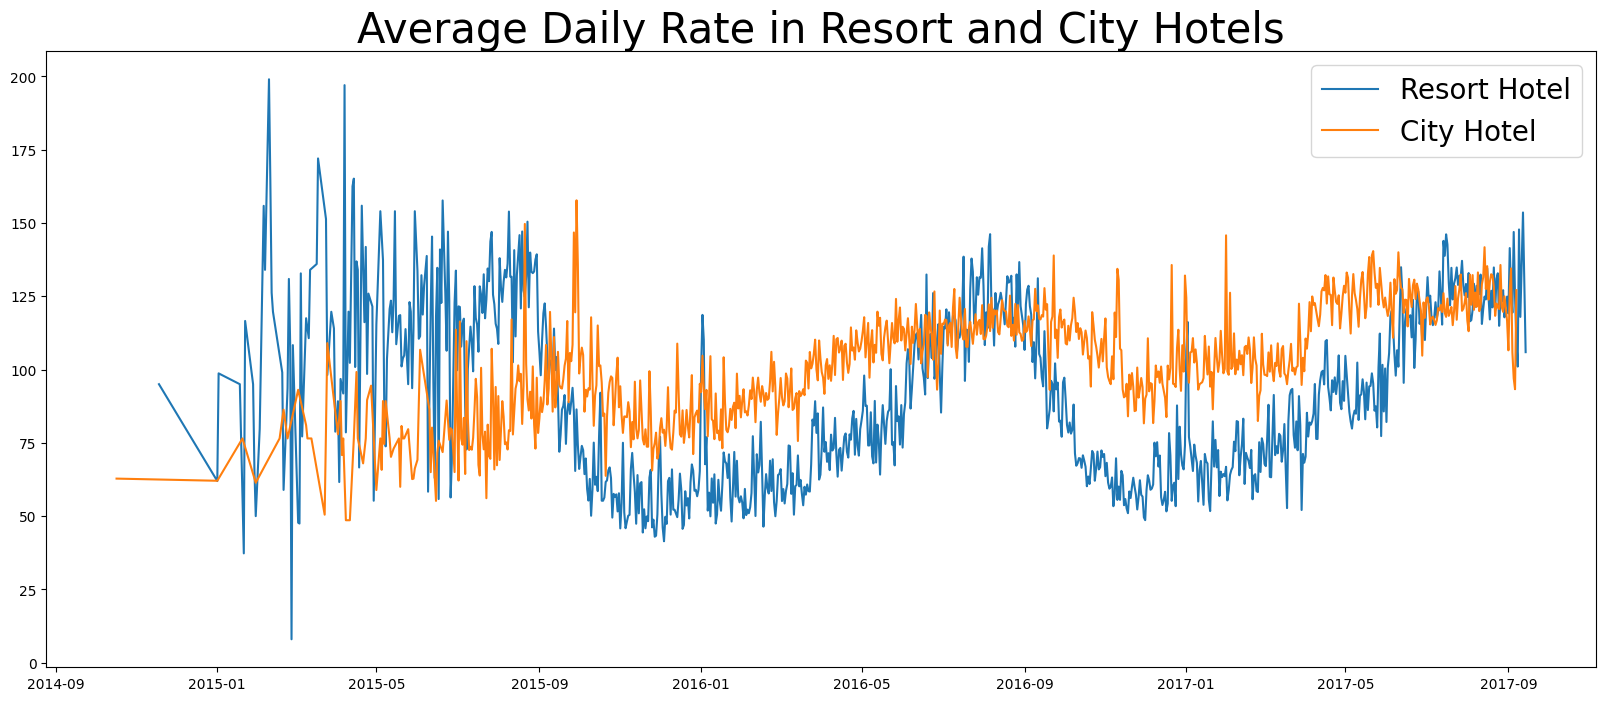

In [256]:
plt.figure(figsize=(20,8))
plt.title("Average Daily Rate in Resort and City Hotels", fontsize= 30)
plt.plot(resort_hotel.index,resort_hotel["adr"], label="Resort Hotel")
plt.plot(city_hotel.index,city_hotel["adr"], label="City Hotel")
plt.legend(fontsize=20)
plt.show()

###### In this code, we first separate the dataset into two groups: "Resort Hotel" and "City Hotel." Then, we calculate the average daily rate (ADR) for each group, grouping by the reservation status date. Finally, we create a line plot to compare the ADR trends over time for both types of hotels. 
###### Summary:The line plot shows the average daily rate (ADR) for resort and city hotels over time. The ADR for resort hotels is generally higher than the ADR for city hotels. The ADR for both resort and city hotels tends to fluctuate over time

###### 4.Reservation status per month

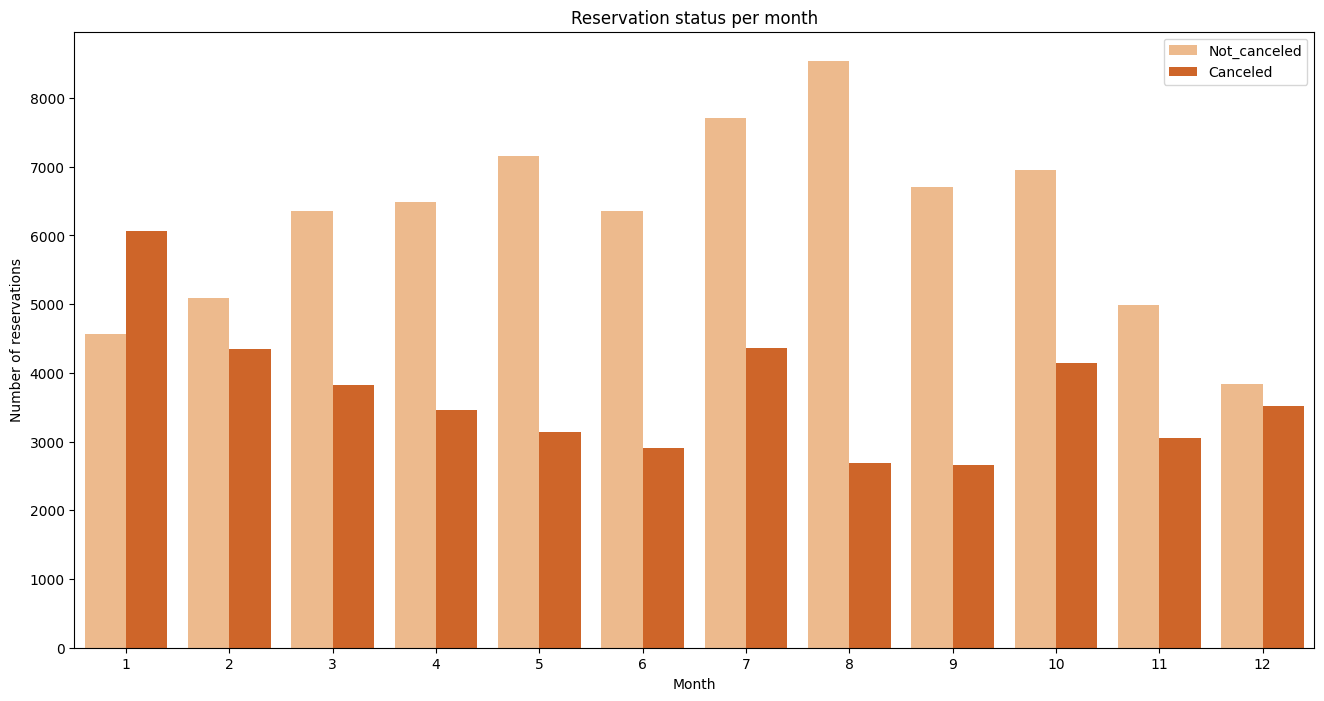

In [264]:
df["month"]= df["reservation_status_date"].dt.month
plt.figure(figsize=(16, 8))
axl = sns.countplot(x="month", hue="is_canceled", data=df, palette="Oranges")
legend_labels, _ = axl.get_legend_handles_labels()
axl.legend(bbox_to_anchor=(1, 1))
plt.title("Reservation status per month")
plt.xlabel("Month")
plt.ylabel("Number of reservations")
plt.legend(["Not_canceled","Canceled"])
plt.show()

###### This code adds a month column to the DataFrame and then creates a count plot of the number of reservations that were canceled and not canceled, broken down by month.


###### 5.Average Daily Rate by Month

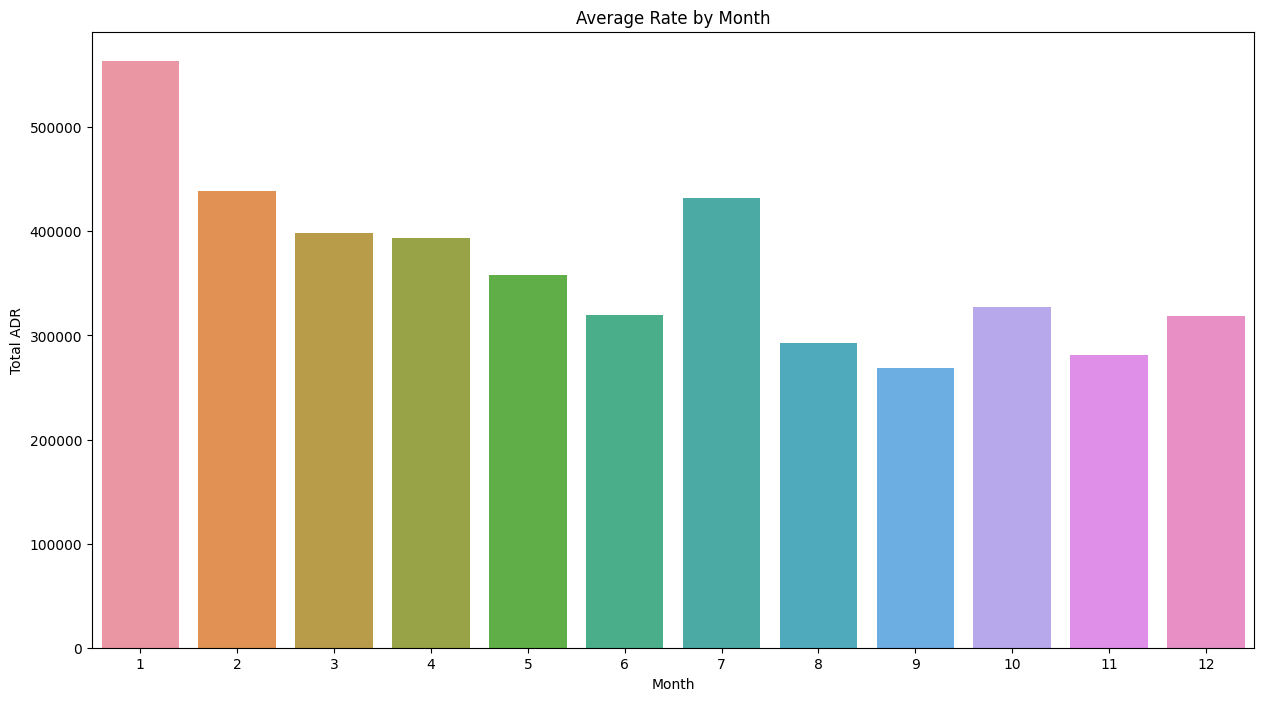

In [280]:
plt.figure(figsize=(15, 8))
sns.barplot(x="month", y="adr", data=df[df["is_canceled"] == 1].groupby("month")[["adr"]].sum().reset_index())
plt.title("Average Rate by Month")
plt.xlabel("Month")
plt.ylabel("Total ADR")
plt.show()


###### this code first groups the DataFrame by month and calculates the total ADR for each month. Then, it plots the total ADR for each month on a bar chart.
###### Summary:The average hotel rate for canceled reservations is highest in the  months (January, July, and February).The average hotel rate for canceled reservations is lowest in the  months (August, september, and November).

###### 6. Top 10 Countries with cancelled reservations

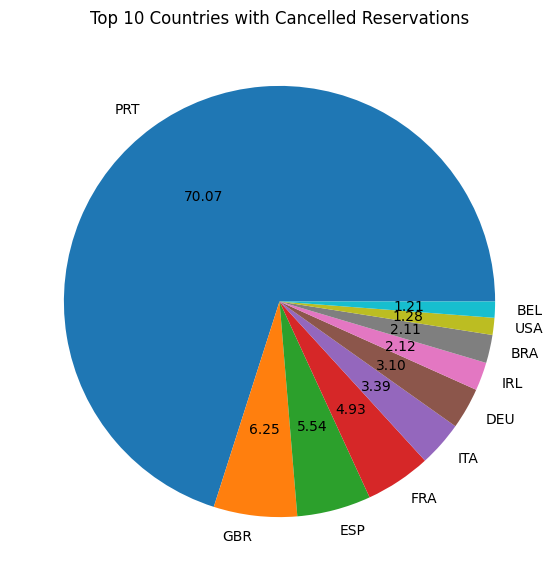

In [283]:
Cancelled_data=df[df["is_canceled"] == 1]
top_10_countries=Cancelled_data["country"].value_counts()[:10]
plt.figure(figsize=(7,7))
plt.title("Top 10 Countries with Cancelled Reservations")
plt.pie(top_10_countries,autopct= '%.2f',labels=top_10_countries.index)
plt.show()

###### this code first creates a new DataFrame that contains only the rows where the is_canceled column is equal to 1. Then, it counts the number of reservations from each country and sorts the countries in descending order by the number of reservations. Finally, it creates a pie chart of the top 10 countries with the highest number of canceled reservations.

###### 7. Clients Reservation Mode

In [286]:
df["market_segment"].value_counts(normalize=True) * 100

Online TA        47.437299
Offline TA/TO    20.319938
Groups           16.657976
Direct           10.469478
Corporate         4.298643
Complementary     0.617336
Aviation          0.199331
Name: market_segment, dtype: float64

In [290]:
# Get the count of each category
value_counts = df["market_segment"].value_counts()

# Calculate the percentage by dividing by the total count and multiplying by 100
percentage = (value_counts / len(df)) * 100

# Create a DataFrame to display both count and percentage
result_df = pd.DataFrame({'Count': value_counts, 'Percentage': percentage})

print(result_df)
#This code will give you a DataFrame with the count and percentage of each category in the "market_segment" column.


               Count  Percentage
Online TA      56402   47.437299
Offline TA/TO  24160   20.319938
Groups         19806   16.657976
Direct         12448   10.469478
Corporate       5111    4.298643
Complementary    734    0.617336
Aviation         237    0.199331


###### 8. Cancellation By Market_segment

In [291]:
Cancelled_data["market_segment"].value_counts(normalize=True)

Online TA        0.469685
Groups           0.273979
Offline TA/TO    0.187484
Direct           0.043485
Corporate        0.022150
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

###### 9.Average Daily Rate Trends for Cancelled and Not Cancelled Reservations

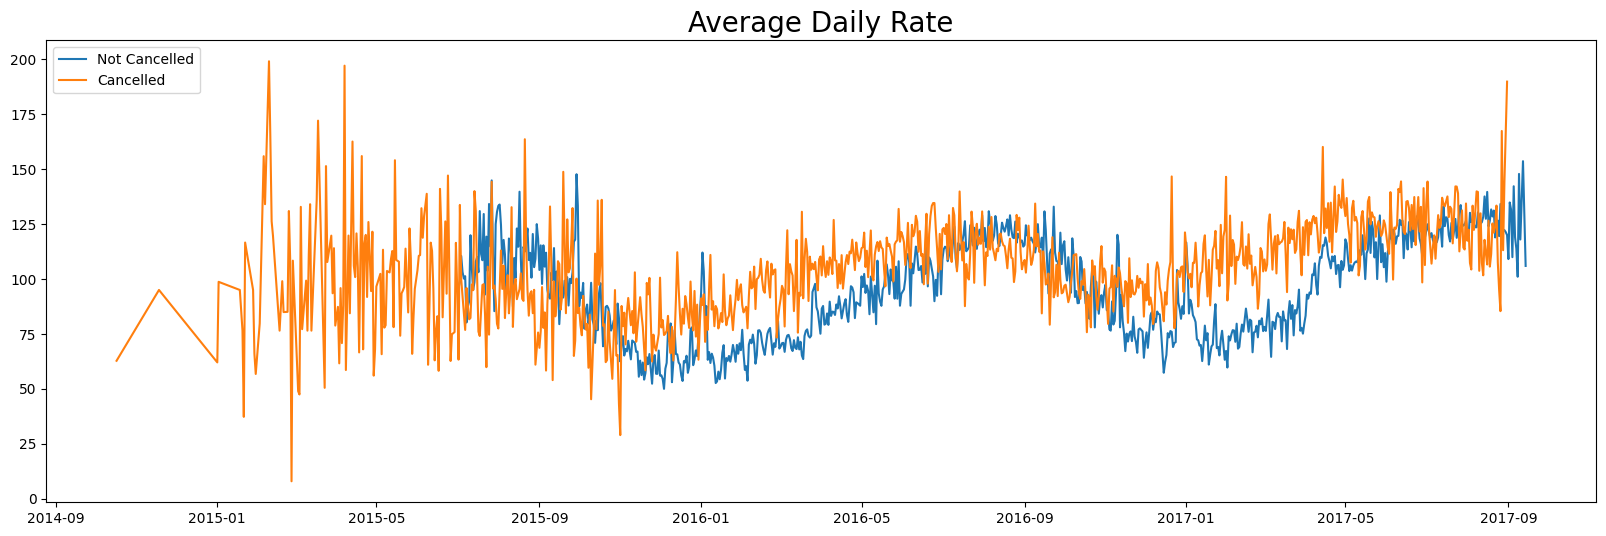

In [300]:
cancelled_df_adr=Cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_df=df[df['is_canceled'] == 0]
not_cancelled_df_adr=not_cancelled_df.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rate",fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='Cancelled')
plt.legend()

###### This code calculates and compares the average daily rates (ADR) for cancelled and not cancelled reservations over time. It first groups the data by reservation status and calculates the mean ADR for each group on each reservation date. Then, it plots these ADR trends for cancelled and not cancelled reservations over time, allowing for a visual comparison of how ADR varies between the two reservation statuses. and due to inconsistency in 2015 data we will filter the data

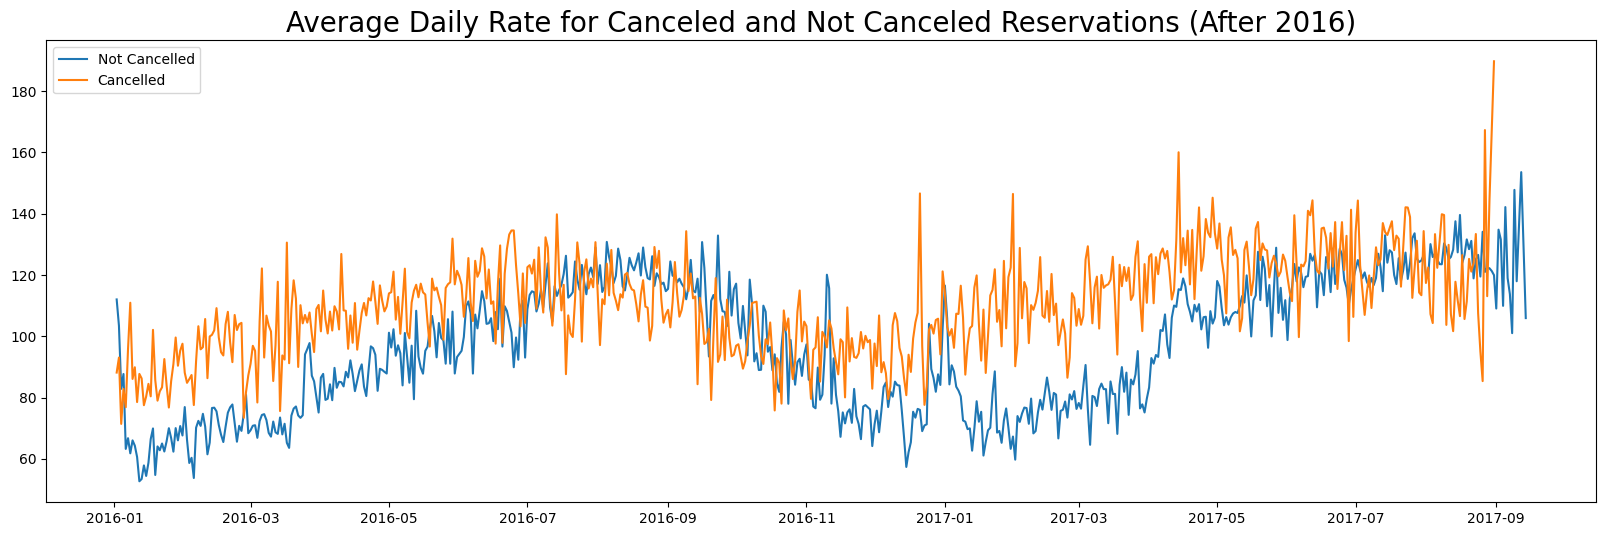

In [301]:
cancelled_df_adr=cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')]
not_cancelled_df_adr=not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016')]
plt.figure(figsize=(20,6))
plt.title("Average Daily Rate for Canceled and Not Canceled Reservations (After 2016)",fontsize=20)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'],label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'],label='Cancelled')
plt.legend()

###### This code filters and plots the average daily rate (ADR) for canceled and not canceled reservations made after the year 2016. It helps visualize how ADR changed for these two reservation types over time.